In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
module_handle="https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector=hub.load(module_handle).signatures['default']



In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .


Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697354 sha256=1246553a29248ac458bb4d15b9f2c8a81bd91a4aa717c9e1ddf0ad6e27679007
  Stored in directory: /tmp/pip-ephem-wheel-cache-ufc6wwt0/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [ ]:
import numpy as np
img_path="/content/iStock-1334652447sm-1.jpg"
img=tf.io.read_file(img_path)
img=tf.image.decode_jpeg(img,channels=3)
converted_img=tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis,...]
result=detector(converted_img)
image_np = img.numpy()


In [ ]:
from object_detection.utils import label_map_util
path_to_labels='/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index=label_map_util.create_category_index_from_labelmap(path_to_labels,use_display_name=True)
category_index


{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
import numpy as np
results= {key:value.numpy() for key, value in result.items()}
results.keys()


dict_keys(['detection_scores', 'detection_class_entities', 'detection_boxes', 'detection_class_names', 'detection_class_labels'])

In [ ]:
object_names = [info['name'] for _, info in category_index.items()]
decoded_entities = [entity.decode() for entity in results['detection_class_entities']]
print(object_names),print(decoded_entities)



['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
['Dog', 'Bicycle', 'Car', 'Wheel', 'Bicycle wheel', 'Wheel', 'Wheel', 'Bicycle wheel', 'Wheel', 'Tree', 'Tree', 'Truck', 'Bicycle', 'Tire'

(None, None)

In [ ]:
class_labels = []
for entity in decoded_entities:
    for info in category_index.values():
        if info['name'].lower() == entity.lower():
            class_labels.append(info['id'])
class_labels


[18, 2, 3, 8, 2, 2, 3, 3, 1, 18, 2, 1, 4, 2, 4, 1, 4, 4, 3]

In [ ]:
from object_detection.utils import visualization_utils as viz_utils
class_labels_np = np.array(class_labels)

In [ ]:
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    results['detection_boxes'],
    class_labels_np,
    results['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=200,
    min_score_thresh=0.5,
    agnostic_mode=False,
    line_thickness=4,
    skip_scores=False,
    skip_labels=False,
    skip_track_ids=False
)


array([[[ 56,  59,  50],
        [ 57,  60,  51],
        [ 58,  61,  52],
        ...,
        [140,  89,  44],
        [ 87,  50,  41],
        [ 64,  74,  49]],

       [[ 56,  59,  50],
        [ 57,  60,  51],
        [ 58,  61,  52],
        ...,
        [123,  75,  35],
        [ 84,  51,  42],
        [ 58,  72,  47]],

       [[ 57,  60,  51],
        [ 57,  60,  51],
        [ 58,  61,  52],
        ...,
        [ 96,  55,  23],
        [ 78,  55,  47],
        [ 46,  65,  43]],

       ...,

       [[159, 167, 178],
        [159, 169, 179],
        [162, 170, 181],
        ...,
        [ 79,  64,  61],
        [ 51,  40,  36],
        [ 63,  54,  49]],

       [[161, 169, 180],
        [160, 168, 179],
        [154, 164, 174],
        ...,
        [ 77,  62,  59],
        [ 54,  40,  37],
        [ 67,  58,  53]],

       [[157, 165, 176],
        [158, 166, 177],
        [151, 161, 171],
        ...,
        [ 78,  63,  60],
        [ 51,  37,  34],
        [ 50,  41,  36]]

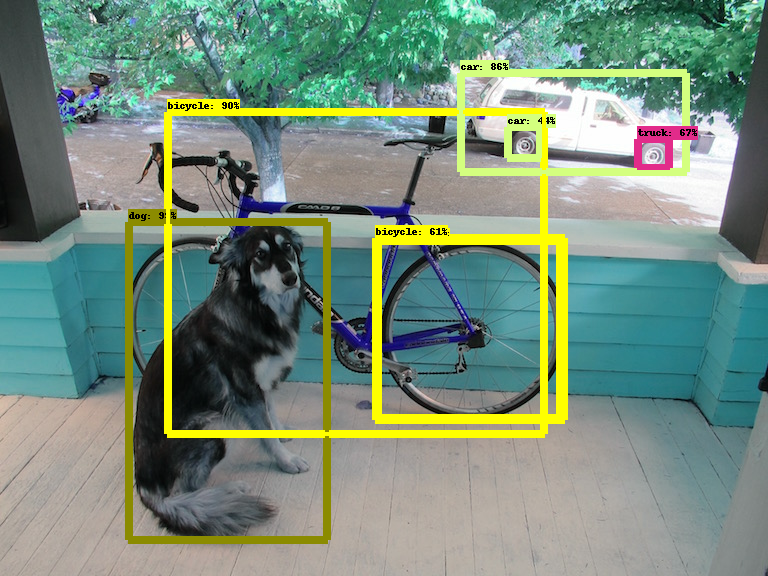

In [ ]:
cv2_imshow(image_np_with_detections)